In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip show scikit-learn



Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, bigframes, Boruta, category-encoders, cesium, eli5, fastai, hep-ml, imbalanced-learn, librosa, lime, mlxtend, nilearn, pyLDAvis, rgf-python, scikit-learn-intelex, scikit-optimize, scikit-plot, shap, sklearn-pandas, TPOT, tsfresh, woodwork, yellowbrick


In [4]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
Note:

In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv('/kaggle/input/cardataset/Car_Hacking_5.csv')

In [7]:
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


In [8]:
df.Label.value_counts()

Label
R        701832
RPM       32539
gear      29944
DoS       29501
Fuzzy     24624
Name: count, dtype: int64

Accuracy: 100.00%
F1-Score: 1.00
Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      5996
       Fuzzy       1.00      1.00      1.00      4989
           R       1.00      1.00      1.00    140110
         RPM       1.00      1.00      1.00      6517
        gear       1.00      1.00      1.00      6076

    accuracy                           1.00    163688
   macro avg       1.00      1.00      1.00    163688
weighted avg       1.00      1.00      1.00    163688



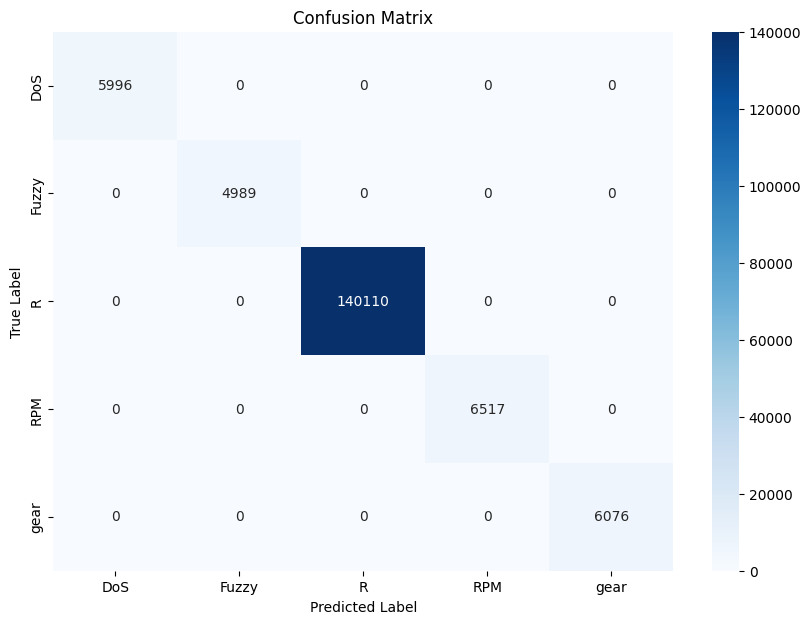

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace with your dataset path)
df = pd.read_csv('/kaggle/input/cardataset/Car_Hacking_5.csv')  # Ensure your dataset is in CSV format

# Features (CAN ID and DATA columns) and Target (Label)
X = df[['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']]
y = df['Label']

# Encode the labels to numerical values (R, RPM, gear, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Decode the predicted labels back to original categories
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1-Score: {f1:.2f}')

# Classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Save the trained model using pickle
import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)


In [15]:
# Import necessary libraries
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the saved Random Forest model
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the LabelEncoder used during training
label_encoder = LabelEncoder()
# Add your labels (for example, based on the classes: 'R', 'RPM', 'gear', 'DoS', 'Fuzzy')
label_encoder.classes_ = np.array(['Dos', 'Fuzzy', 'R', 'RPM', 'gear'])  # Ensure this matches your label classes

# Function to take user input for prediction
def predict_label(can_id, data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7):
    # Create an input array for prediction
    input_data = np.array([[can_id, data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7]])
    
    # Make prediction using the loaded model
    prediction = loaded_model.predict(input_data)
    
    # Convert prediction to the original label
    predicted_label = label_encoder.inverse_transform(prediction)
    
    return predicted_label[0]

# Example: Manually input CAN ID and DATA values (replace with actual input)
can_id = int(input("Enter CAN ID: "))
data_0 = int(input("Enter DATA[0]: "))
data_1 = int(input("Enter DATA[1]: "))
data_2 = int(input("Enter DATA[2]: "))
data_3 = int(input("Enter DATA[3]: "))
data_4 = int(input("Enter DATA[4]: "))
data_5 = int(input("Enter DATA[5]: "))
data_6 = int(input("Enter DATA[6]: "))
data_7 = int(input("Enter DATA[7]: "))

# Call the prediction function with the inputs
predicted_label = predict_label(can_id, data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7)

# Display the prediction
print(f'Predicted Label: {predicted_label}')


Enter CAN ID:  826
Enter DATA[0]:  28
Enter DATA[1]:  4
Enter DATA[2]:  134
Enter DATA[3]:  144
Enter DATA[4]:  127
Enter DATA[5]:  8
Enter DATA[6]:  126
Enter DATA[7]:  201


Predicted Label: Fuzzy


In [13]:
df1=df[df['Label']=='Fuzzy']

In [14]:
df1

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
182254,826,28,4,134,144,127,8,126,201,Fuzzy
182258,601,203,47,35,141,54,15,131,196,Fuzzy
182260,1371,193,149,90,0,126,99,44,84,Fuzzy
182262,1087,121,221,146,239,80,40,82,145,Fuzzy
182264,220,219,117,8,236,180,173,171,101,Fuzzy
...,...,...,...,...,...,...,...,...,...,...
324310,1679,163,2,24,53,232,122,83,122,Fuzzy
324312,1003,22,17,7,13,9,176,143,139,Fuzzy
324322,1286,96,111,32,111,169,92,167,54,Fuzzy
324323,1761,196,5,28,129,160,114,65,229,Fuzzy


Random Forest Accuracy: 100.00%
Random Forest F1-Score: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      5996
       Fuzzy       1.00      1.00      1.00      4989
           R       1.00      1.00      1.00    140110
         RPM       1.00      1.00      1.00      6517
        gear       1.00      1.00      1.00      6076

    accuracy                           1.00    163688
   macro avg       1.00      1.00      1.00    163688
weighted avg       1.00      1.00      1.00    163688



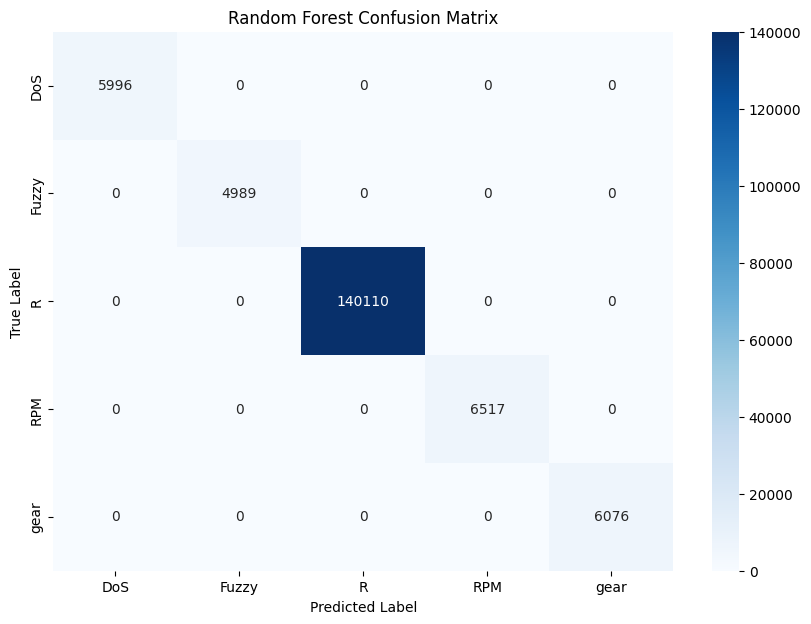

Logistic Regression Accuracy: 99.57%
Logistic Regression F1-Score: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      5996
       Fuzzy       0.99      0.87      0.93      4989
           R       1.00      1.00      1.00    140110
         RPM       1.00      1.00      1.00      6517
        gear       1.00      1.00      1.00      6076

    accuracy                           1.00    163688
   macro avg       1.00      0.97      0.98    163688
weighted avg       1.00      1.00      1.00    163688



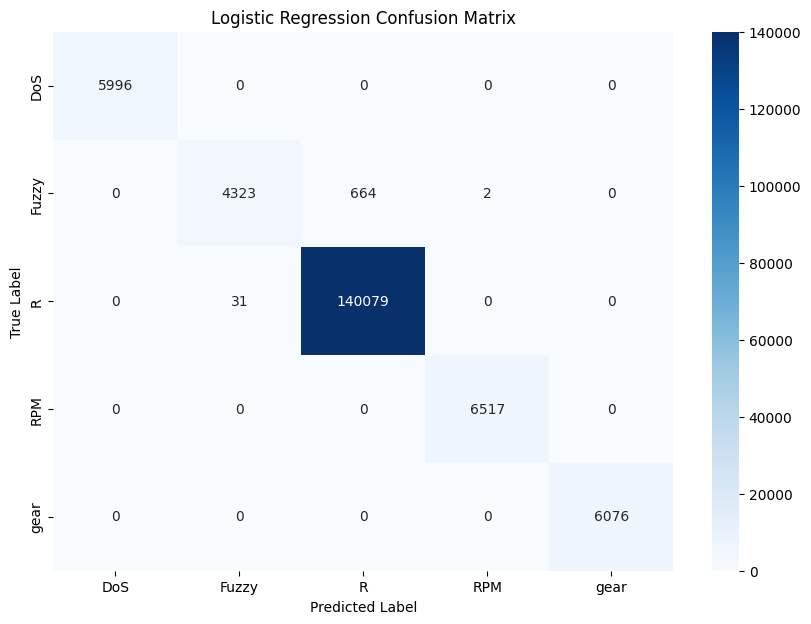

KNN Accuracy: 99.99%
KNN F1-Score: 1.00
KNN Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      5996
       Fuzzy       1.00      1.00      1.00      4989
           R       1.00      1.00      1.00    140110
         RPM       1.00      1.00      1.00      6517
        gear       1.00      1.00      1.00      6076

    accuracy                           1.00    163688
   macro avg       1.00      1.00      1.00    163688
weighted avg       1.00      1.00      1.00    163688



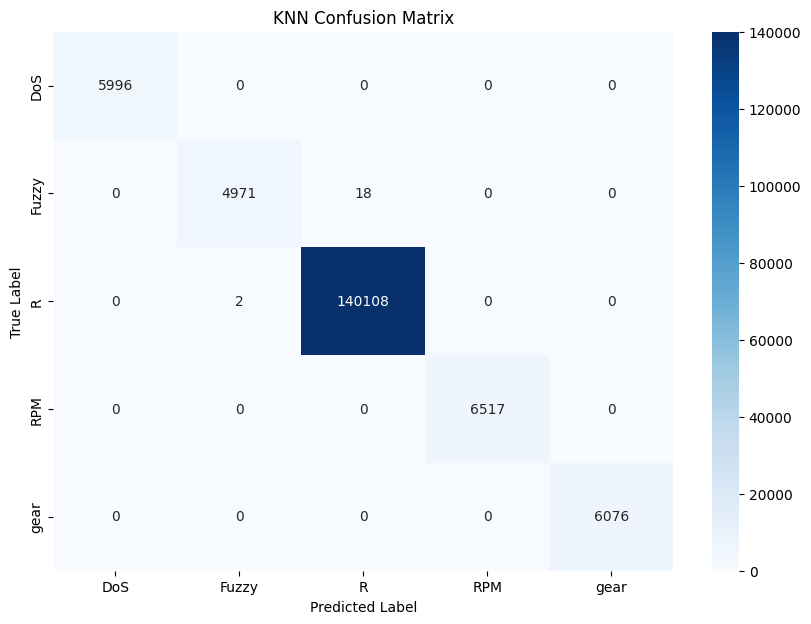

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/cardataset/Car_Hacking_5.csv')  # Replace with your dataset path

# Separate features and labels
X = df[['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']]
y = df['Label']

# Label encoding for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the models
random_forest.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predict with each model
y_pred_rf = random_forest.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Function to calculate metrics and display confusion matrix
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')
    print(f'{model_name} F1-Score: {f1:.2f}')
    
    # Classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluate each model
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_knn, "KNN")
